<a href="https://colab.research.google.com/github/Claudio-Ferriz/Proyectos-Legislativos/blob/main/Proyectos_Legislativos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importación de librerias y desarrollo de los dataframes a trabajar

## Librerías

In [45]:
# El primer paso es importar y ejecutar todas las librerías en python con
# las que desarrollaremos nuestros modelos.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, log_loss
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV


## Enlace a los datasets originales

Proyectos parlamentarios en los que intervino la Cámara de Diputados (Formato csv)

https://datos.hcdn.gob.ar/dataset/proyectos-parlamentarios/resource/22b2d52c-7a0e-426b-ac0a-a3326c388ba6


Estado de los expedientes parlamentarios de proyectos (Formato csv)

https://datos.hcdn.gob.ar/dataset/resultado-proyectos


Comisiones parlamentarias permanentes, especiales y bicamerales en las que interviene la Cámara de Diputados (Formato csv)

https://datos.hcdn.gob.ar/dataset/comisiones/resource/6774a719-b439-4ef9-8943-9ea66bb588c6


Giro a Comisiones de Leyes Sancionadas (Formato csv)

https://datos.hcdn.gob.ar/dataset/comisiones/resource/79334dda-b3af-4056-b930-0f288f5dfaeb


Dictamenes Leyes Sancionadas (Formato csv)

https://datos.hcdn.gob.ar/dataset/comisiones/resource/4d6ac4e3-8113-42b8-831f-fda680d7e604



## Dataframes

In [46]:
# Generamos el primer dataframe referido a Proyectos Legislativos el cual
# se encuentra en formato excel importandolo desde el repositorio
# github del proyecto.

df = pd.read_excel('https://github.com/Claudio-Ferriz/Proyectos-Legislativos/raw/refs/heads/main/Proyectos%20Legislativos.xlsx')

# Eliminamos la columna 'id' que no genera valor a nuestro dataframe (df).

df.drop(columns=['id'], inplace=True)

# Se generan tres nuevas columnas en el df a partir de
# 'publicacion_fecha' para generar mejores visualizaciones y un
# modelado óptimo. Por último se elimina la mencionada columna.

df['publicacion_año'] = df['publicacion_fecha'].dt.year
df['publicacion_mes'] = df['publicacion_fecha'].dt.month
df['publicacion_día'] = df['publicacion_fecha'].dt.day
df = df.drop(columns=['publicacion_fecha'])

# Generamos el segundo dataframe referido a Resultado de Proyectos el cual
# se encuentra en formato excel importandolo desde el repositorio
# github del proyecto.

df1 = pd.read_excel('https://github.com/Claudio-Ferriz/Proyectos-Legislativos/raw/refs/heads/main/resultado_de_proyectos1.9.xlsx')

# Eliminamos las columnas 'id' e 'od_numero' que no generan valor a nuestro df1.

df1.drop(columns=['id','od_numero'], inplace=True)

#

df1.dropna(subset=['resultado'], inplace=True)

# Renombramos la columna 'expediente_id' por 'proyecto_id', ya que es la misma
# variable y datos que 'proyecto_id' del primer df. De esta manera podremos
# realizar una unión (join) entre ambas tablas y robustecer nuestro nuevo df.

df1.rename(columns={'expediente_id': 'proyecto_id'}, inplace=True)

df2 = pd.read_excel('https://github.com/Claudio-Ferriz/Proyectos-Legislativos/raw/refs/heads/main/comisiones1.9.xlsx')

df2.drop(columns=['id','periodo_inicio','periodo_finaliacion','fecha_inicio','fecha_finalizacion'], inplace=True)

df3 = pd.read_excel('https://github.com/Claudio-Ferriz/Proyectos-Legislativos/raw/refs/heads/main/giro_comisiones1.2.xlsx')

df4= pd.read_excel('https://github.com/Claudio-Ferriz/Proyectos-Legislativos/raw/refs/heads/main/dictamenes_de_leyes_sancionadas1.4.xlsx')

# Por medio del merge se realiza un inner join para unir ambos df por
# medio de la columna 'proyecto_id'

df5 = pd.merge(df, df1, on='proyecto_id', how='inner')



# Objetivos analíticos e hipótesis

## Contexto comercial

## Problema comercial

## Contexto analítico

# Exploratory Data Analysis (EDA)

## Primer dataframe

In [ ]:
# Ejecutamos el primer dataframe.

df

,proyecto_id,titulo,publicacion_id,camara_origen,exp_diputados,exp_senado,tipo,publicacion_año,publicacion_mes,publicacion_día
0,HCDN276217,PEDIDO DE INFORMES AL PODER EJECUTIVO SOBRE DI...,HCDN142TP080,Diputados,3297-D-2024,NaN,RESOLUCION,2024,6,24
1,HCDN276218,EXPRESAR ADHESIÓN Al “Día Internacional de las...,HCDN142TP080,Diputados,3294-D-2024,NaN,RESOLUCION,2024,6,24
2,HCDN276210,inStitúyase el 24 de junio de cada año como “D...,HCDN142TP080,Diputados,3293-D-2024,NaN,LEY,2024,6,24
3,HCDN276226,SOLICITAR AL PODER EJECUTIVO DISPONGA LA REGLA...,HCDN142TP080,Diputados,3292-D-2024,NaN,RESOLUCION,2024,6,24
4,HCDN276224,PEDIDO DE INFORMES VERBALES A La titular de la...,HCDN142TP080,Diputados,3289-D-2024,NaN,RESOLUCION,2024,6,24
...,...,...,...,...,...,...,...,...,...,...
102875,HCDN092251,ACCESIBILIDAD Y TRANSPORTE PARA PERSONAS CON D...,HCDN126TP001,Diputados,0005-D-2008,NaN,LEY,2008,3,3
102876,HCDN092299,REGLAMENTO DE LA H CAMARA DE DIPUTADOS DE LA N...,HCDN126TP001,Diputados,0004-D-2008,NaN,RESOLUCION,2008,3,3
102877,HCDN092334,"DECLARAR DE INTERES DE LA H CAMARA EL ""29 CONG...",HCDN126TP001,Diputados,0003-D-2008,NaN,DECLARACION,2008,3,3
102878,HCDN092250,CREACION Y FUNCIONAMIENTO DE LAS COMISIONES IN...,HCDN126TP001,Diputados,0002-D-2008,NaN,LEY,2008,3,3


In [35]:
# Analizamos los tipos de datos que conforman a las variables del df y
# observamos la cantidad total de datos no nulos por cada una de ellas.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102880 entries, 0 to 102879
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   proyecto_id        102880 non-null  object        
 1   titulo             102880 non-null  object        
 2   publicacion_fecha  102880 non-null  datetime64[ns]
 3   publicacion_id     100201 non-null  object        
 4   camara_origen      102880 non-null  object        
 5   exp_diputados      102880 non-null  object        
 6   exp_senado         3235 non-null    object        
 7   tipo               102880 non-null  object        
dtypes: datetime64[ns](1), object(7)
memory usage: 6.3+ MB


In [ ]:
# Observamos la cantidad total de registros y la cantidad total de
# columnas del df.

df.shape

(102880, 10)

## Segundo dataframe

In [ ]:
# Ejecutamos el segundo dataframe.

df1

,proyecto_id,cabecera,dictamen_tipo,od_publicacion,fecha,resultado
3,HCDN161333,cabecera,Orden del Dia,2014-05-13,00:00:00,APROBADO
5,HCDN118414,cabecera,Orden del Dia,2010-11-29,00:00:00,APROBADO
6,HCDN124930,cabecera,Orden del Dia,2011-08-29,00:00:00,APROBADO
7,HCDN114819,cabecera,Orden del Dia,2010-07-23,00:00:00,APROBADO
10,HCDN099344,cabecera,Orden del Dia,2008-12-03,2009-03-11 00:00:00,APROBADO
...,...,...,...,...,...,...
104345,HCDN164027,cabecera,Orden del Dia,2014-08-09,00:00:00,APROBADO
104347,HCDN173051,cabecera,Orden del Dia,2015-06-16,00:00:00,APROBADO
104348,HCDN187348,cabecera,Orden del Dia,2016-09-08,00:00:00,APROBADO
104351,HCDN217664,cabecera,Orden del Dia,2018-11-26,00:00:00,APROBADO


In [ ]:
# Analizamos los tipos de datos que conforman a las variables del df1 y
# observamos la cantidad total de datos no nulos por cada una de ellas.

df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15215 entries, 3 to 104352
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   proyecto_id     15215 non-null  object        
 1   cabecera        15215 non-null  object        
 2   dictamen_tipo   15215 non-null  object        
 3   od_publicacion  14780 non-null  datetime64[ns]
 4   fecha           15215 non-null  object        
 5   resultado       15215 non-null  object        
dtypes: datetime64[ns](1), object(5)
memory usage: 832.1+ KB


In [ ]:
# Observamos la cantidad total de registros y la cantidad total de
# columnas del df1.

df1.shape

(15215, 6)

## Tercer dataframe

In [ ]:
# Ejecutamos el tercer dataframe.

df2

,comision_nombre,comision_grupo,Tipo de ComisiÃ³n
0,ESPECIAL ANALISIS DEL SISTEMA POR PEAJE Y FINA...,CD,E
1,ESPECIAL INVESTIGADORA DE HECHOS ILICITOS Y CO...,CD,E
2,ESPECIAL INVESTIGADORA CONTRATACIONES ESTADO A...,CD,E
3,ESPECIAL INVESTIGADORA ADMINISTRACION NACIONAL...,CD,E
4,ASUNTOS MUNICIPALES,CD,P
5,VIVIENDA Y ORDENAMIENTO URBANO,CD,P
6,"PETICIONES, PODERES Y REGLAMENTO",CD,P
7,JUICIO POLITICO,CD,P
8,RECURSOS NATURALES Y CONSERVACION DEL AMBIENTE...,CD,P
9,TURISMO,CD,P


In [ ]:
# Analizamos los tipos de datos que conforman a las variables del df2 y
# observamos la cantidad total de datos no nulos por cada una de ellas.

df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55 entries, 0 to 54
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   comision_nombre    55 non-null     object
 1   comision_grupo     55 non-null     object
 2   Tipo de ComisiÃ³n  55 non-null     object
dtypes: object(3)
memory usage: 1.4+ KB


In [ ]:
df2.shape

(55, 3)

## Cuarto dataframe

In [ ]:
# Ejecutamos el cuarto dataframe.

df3

,proyecto_id,comiision,orden
0,HCDN000000,SOBRE TABLAS,1
1,HCDN001090,OBRAS PUBLICAS,1
2,HCDN001090,PRESUPUESTO Y HACIENDA,2
3,HCDN001091,TURISMO,1
4,HCDN001092,ASUNTOS CONSTITUCIONALES,1
...,...,...,...
391102,HCDN272088,POBLACION Y DESARROLLO HUMANO,1
391103,HCDN272089,"INFRAESTRUCTURA, VIVIENDA Y TRANSPORTE",1
391104,HCDN272090,PRESUPUESTO Y HACIENDA,1
391105,HCDN272091,"MINERIA, ENERGIA Y COMBUSTIBLES",1


In [ ]:
# Analizamos los tipos de datos que conforman a las variables del df3 y
# observamos la cantidad total de datos no nulos por cada una de ellas.

df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 391107 entries, 0 to 391106
Data columns (total 3 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   proyecto_id  391107 non-null  object
 1   comiision    391107 non-null  object
 2   orden        391107 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 9.0+ MB


In [ ]:
# Observamos la cantidad total de registros y la cantidad total de
# columnas del df3.

df3.shape

(391107, 3)

## Quinto dataframe

In [ ]:
# Ejecutamos el quinto dataframe.

df4


,proyecto_id,camara,dictamen_tipo,dictamen_numero,dictamen_anio,dictamen_fecha,ley
0,HCDN092379,Senado,Orden del Dia,6200.0,2009,2009-11-16 00:00:00,26580
1,HCDN092379,Diputados,Orden del Dia,13610.0,2008,2008-12-03 00:00:00,26580
2,HCDN092540,Diputados,Orden del Dia,1090.0,2008,2008-04-22 00:00:00,26574
3,HCDN092540,Senado,Orden del Dia,6650.0,2009,2009-11-18 00:00:00,26574
4,HCDN092543,Diputados,Orden del Dia,1420.0,2008,2008-04-23 00:00:00,26598
...,...,...,...,...,...,...,...
2476,HCDN266777,Diputados,Orden del Dia,6230.0,2023,2023-04-14 00:00:00,27735
2477,HCDN267491,Diputados,Orden del Dia,7370.0,2023,2023-08-31 00:00:00,27731
2478,HCDN267491,Senado,Orden del Dia,2070.0,2023,2023-09-21 00:00:00,27731
2479,HCDN270671,Senado,Orden del Dia,2010.0,2023,2023-09-21 00:00:00,27725


In [ ]:
# Analizamos los tipos de datos que conforman a las variables del df4 y
# observamos la cantidad total de datos no nulos por cada una de ellas.

df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2481 entries, 0 to 2480
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   proyecto_id      2481 non-null   object 
 1   camara           2468 non-null   object 
 2   dictamen_tipo    2481 non-null   object 
 3   dictamen_numero  2402 non-null   float64
 4   dictamen_anio    2481 non-null   int64  
 5   dictamen_fecha   2481 non-null   object 
 6   ley              2481 non-null   int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 135.8+ KB


In [ ]:
# Observamos la cantidad total de registros y la cantidad total de
# columnas del df4.

df4.shape

(2481, 7)

## Sexto dataframe

In [ ]:
# Ejecutamos el sexto dataframe.

df5


,proyecto_id,titulo,publicacion_id,camara_origen,exp_diputados,exp_senado,tipo,publicacion_año,publicacion_mes,publicacion_día,cabecera,dictamen_tipo,od_publicacion,fecha,resultado
0,HCDN275005,EXPRESAR QUE VERIA CON AGRADO QUE EL PODER EJE...,HCDN142TP044,Diputados,1919-D-2024,NaN,RESOLUCION,2024,4,29,cabecera,Orden del Dia,2024-05-17,00:00:00,APROBADO
1,HCDN274890,DECLARAR DE INTERES DE LA H. CAMARA LOS ENCUEN...,HCDN142TP041,Diputados,1820-D-2024,NaN,DECLARACION,2024,4,24,cabecera,Orden del Dia,2024-05-13,00:00:00,APROBADO
2,HCDN274588,"DECLARAR DE INTERES DE LA H. CAMARA LA ""47° FI...",HCDN142TP037,Diputados,1670-D-2024,NaN,DECLARACION,2024,4,18,cabecera,Orden del Dia,2024-05-13,00:00:00,APROBADO
3,HCDN274583,"DECLARAR DE INTERES DE LA H. CAMARA LA ""2 FECH...",HCDN142TP037,Diputados,1634-D-2024,NaN,RESOLUCION,2024,4,18,cabecera,Orden del Dia,2024-05-13,00:00:00,APROBADO
4,HCDN274591,EXPRESAR BENEPLACITO POR LOS AVANCES LOGRADOS ...,HCDN142TP037,Diputados,1623-D-2024,NaN,DECLARACION,2024,4,18,cabecera,Orden del Dia,2024-05-10,00:00:00,APROBADO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15210,HCDN092327,PEDIDO DE INFORMES AL PODER EJECUTIVO SOBRE LA...,HCDN126TP001,Diputados,0026-D-2008,NaN,RESOLUCION,2008,3,3,cabecera,Orden del Dia,2008-09-03,2009-03-11 00:00:00,APROBADO
15211,HCDN092262,CODIGO PROCESAL CIVIL Y COMERCIAL DE LA NACION...,HCDN126TP001,Diputados,0022-D-2008,0084-CD-2008,LEY,2008,3,3,cabecera,Orden del Dia,2008-08-21,2008-12-03 00:00:00,MEDIA SANCION
15212,HCDN093279,DECLARAR MONUMENTO HISTORICO NACIONAL A LA IGL...,NaN,Senado,0008-S-2009,0005-S-2008,LEY,2008,3,3,cabecera,Orden del Dia,2009-10-26,2009-11-18 00:00:00,SANCIONADO
15213,HCDN092335,DECLARAR DE INTERES DE LA H CAMARA EL RELEVO D...,HCDN126TP001,Diputados,0006-D-2008,NaN,DECLARACION,2008,3,3,cabecera,Orden del Dia,2008-04-07,2008-05-07 00:00:00,APROBADO


In [ ]:
# Analizamos los tipos de datos que conforman a las variables del df5 y
# observamos la cantidad total de datos no nulos por cada una de ellas.

df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15215 entries, 0 to 15214
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   proyecto_id      15215 non-null  object        
 1   titulo           15215 non-null  object        
 2   publicacion_id   13753 non-null  object        
 3   camara_origen    15215 non-null  object        
 4   exp_diputados    15215 non-null  object        
 5   exp_senado       2233 non-null   object        
 6   tipo             15215 non-null  object        
 7   publicacion_año  15215 non-null  int32         
 8   publicacion_mes  15215 non-null  int32         
 9   publicacion_día  15215 non-null  int32         
 10  cabecera         15215 non-null  object        
 11  dictamen_tipo    15215 non-null  object        
 12  od_publicacion   14780 non-null  datetime64[ns]
 13  fecha            15215 non-null  object        
 14  resultado        15215 non-null  objec

In [ ]:
df5.isnull().sum()

,0
proyecto_id,0
titulo,0
publicacion_id,6624
camara_origen,0
exp_diputados,0
exp_senado,146096
tipo,0
publicacion_año,0
publicacion_mes,0
publicacion_día,0


In [ ]:
# Observamos la cantidad total de registros y la cantidad total de
# columnas del df5.

df5.shape

(15215, 15)

In [ ]:
df5.camara_origen.value_counts()


,count
camara_origen,
Diputados,14168
Senado,1047


In [ ]:
df5.tipo.value_counts()

,count
tipo,
RESOLUCION,9401
DECLARACION,3906
LEY,1289
MENSAJE Y PROYECTO DE LEY,504
MENSAJE,115


In [ ]:
df5.publicacion_año.value_counts()


,count
publicacion_año,
2012,1717
2008,1614
2010,1612
2014,1575
2013,1169
2011,1062
2009,1057
2016,1003
2018,926


In [ ]:
df5.publicacion_mes.value_counts()

,count
publicacion_mes,
3,2616
4,2066
5,1999
6,1782
8,1663
9,1621
10,1346
7,1195
11,532


In [ ]:
df5.dictamen_tipo.value_counts()


,count
dictamen_tipo,
Orden del Dia,14729
ARTICULO 114,354
ARTICULO 204,81
Dictamen Sin Nro.,51


In [ ]:
df5.resultado.value_counts()


,count
resultado,
APROBADO,13427
MEDIA SANCION,1158
SANCIONADO,619
RETIRADO,8
RECHAZADO,3


## Visualizaciones

Visualizaciones a partir del dataframe seleccionado para el análisis y posterior modelado en machine learning.

<Axes: xlabel='camara_origen', ylabel='count'>

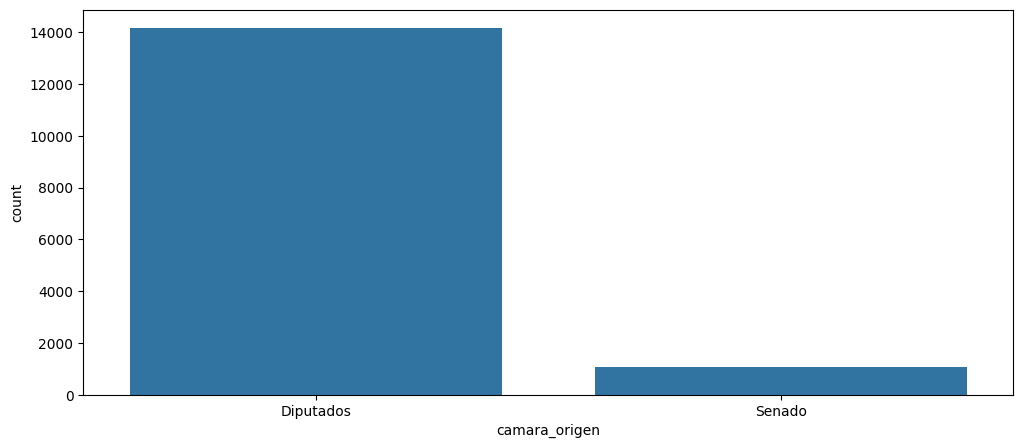

In [47]:
plt.figure(figsize=[12,5])
sns.countplot(df5, x='camara_origen')

<Axes: xlabel='camara_origen', ylabel='count'>

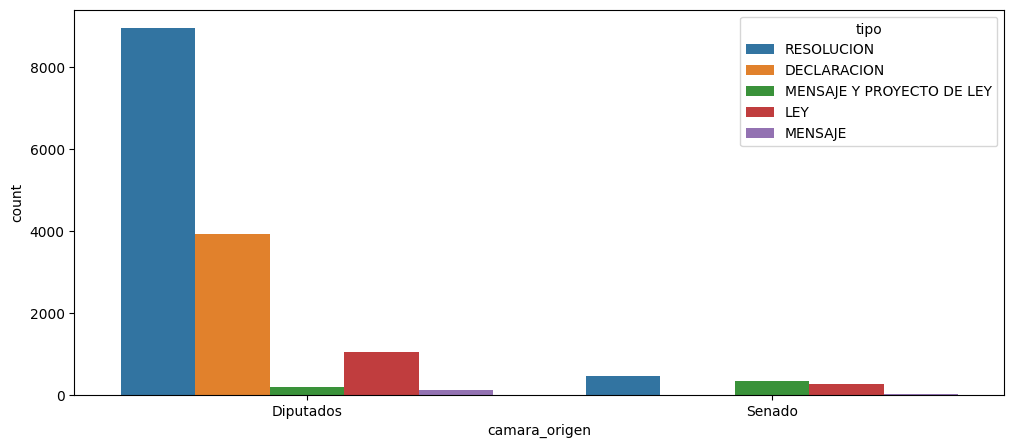

In [48]:
plt.figure(figsize=[12,5])
sns.countplot(df5, x='camara_origen', hue='tipo')

<Axes: xlabel='dictamen_tipo', ylabel='count'>

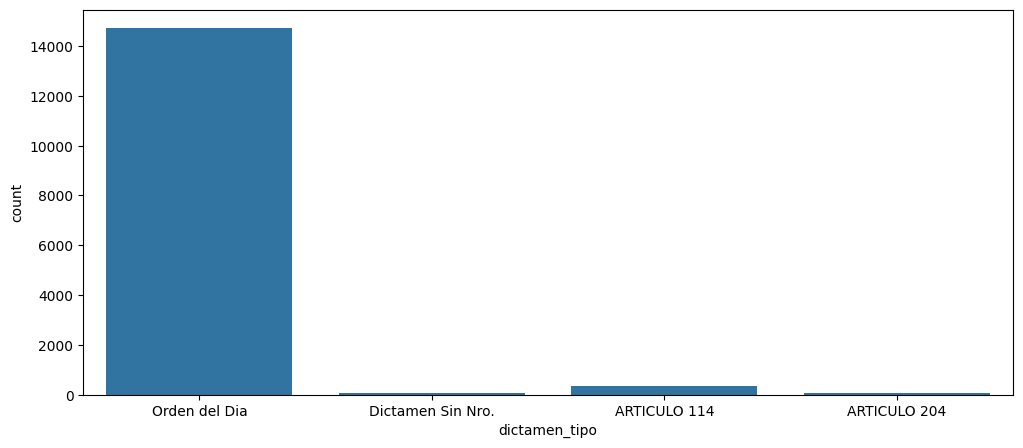

In [49]:
plt.figure(figsize=[12,5])
sns.countplot(df5, x='dictamen_tipo')

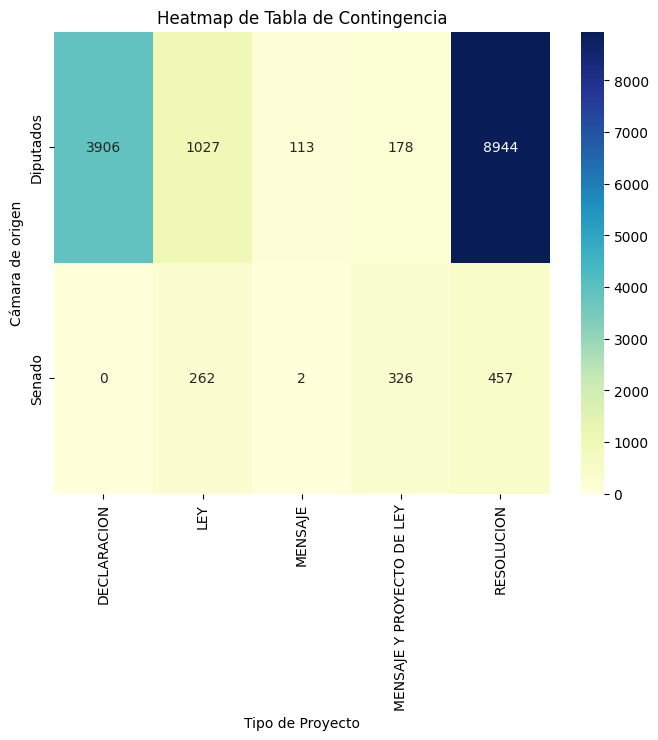

In [50]:
contingency_table = pd.crosstab(df5['camara_origen'], df5['tipo'])

plt.figure(figsize=(8, 6))

sns.heatmap(contingency_table, annot=True, cmap='YlGnBu', fmt='d')

plt.title('Heatmap de Tabla de Contingencia')
plt.xlabel('Tipo de Proyecto')
plt.ylabel('Cámara de origen')
plt.show()

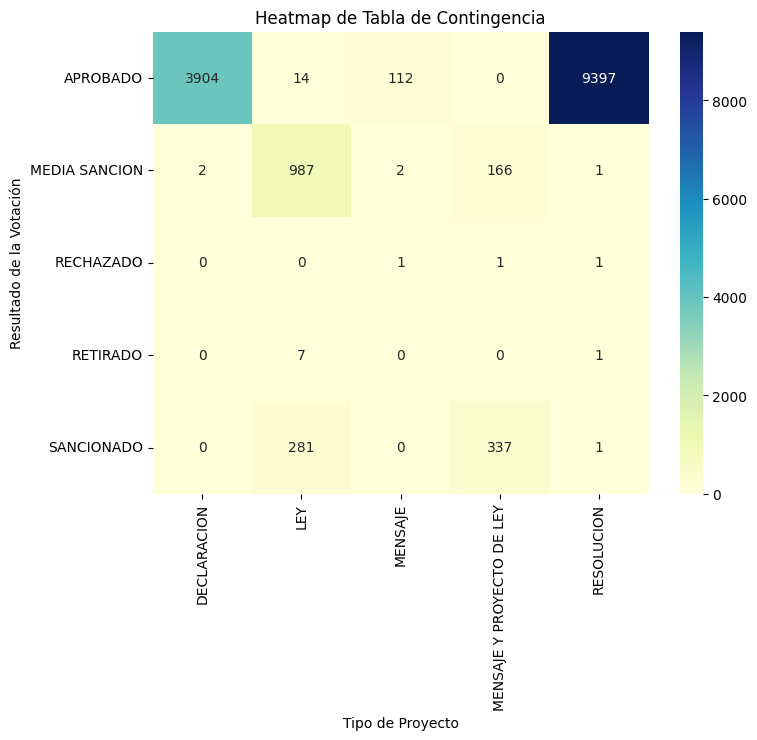

In [51]:
contingency_table = pd.crosstab(df5['resultado'], df5['tipo'])

plt.figure(figsize=(8, 6))

sns.heatmap(contingency_table, annot=True, cmap='YlGnBu', fmt='d')

plt.title('Heatmap de Tabla de Contingencia')
plt.xlabel('Tipo de Proyecto')
plt.ylabel('Resultado de la Votación')
plt.show()

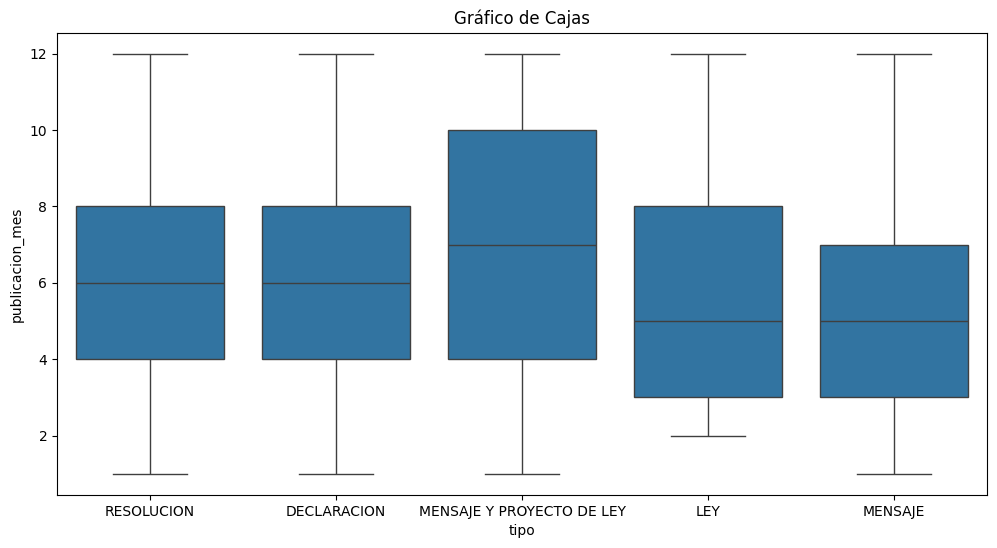

In [52]:
plt.figure(figsize=(12, 6))

sns.boxplot(x='tipo', y='publicacion_mes', data=df5)
plt.title('Gráfico de Cajas')
plt.show()

# Entrenamiento y validación de modelos de machine learning

## GridSearchCV

In [53]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15215 entries, 0 to 15214
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   proyecto_id      15215 non-null  object        
 1   titulo           15215 non-null  object        
 2   publicacion_id   13753 non-null  object        
 3   camara_origen    15215 non-null  object        
 4   exp_diputados    15215 non-null  object        
 5   exp_senado       2233 non-null   object        
 6   tipo             15215 non-null  object        
 7   publicacion_año  15215 non-null  int32         
 8   publicacion_mes  15215 non-null  int32         
 9   publicacion_día  15215 non-null  int32         
 10  cabecera         15215 non-null  object        
 11  dictamen_tipo    15215 non-null  object        
 12  od_publicacion   14780 non-null  datetime64[ns]
 13  fecha            15215 non-null  object        
 14  resultado        15215 non-null  objec

In [54]:
# Eliminamos las columnas 'proyecto_id','titulo','publicacion_id',
# 'exp_diputados','exp_senado' ,'publicacion_día', 'cabecera',
# 'od_publicacion' y 'fecha'ya que no generan valor al df5
# al momento del modelado de datos.

df5.drop(columns=['proyecto_id','titulo','publicacion_id','exp_diputados','exp_senado','publicacion_día','cabecera','od_publicacion','fecha'], inplace=True)

df5

,camara_origen,tipo,publicacion_año,publicacion_mes,dictamen_tipo,resultado
0,Diputados,RESOLUCION,2024,4,Orden del Dia,APROBADO
1,Diputados,DECLARACION,2024,4,Orden del Dia,APROBADO
2,Diputados,DECLARACION,2024,4,Orden del Dia,APROBADO
3,Diputados,RESOLUCION,2024,4,Orden del Dia,APROBADO
4,Diputados,DECLARACION,2024,4,Orden del Dia,APROBADO
...,...,...,...,...,...,...
15210,Diputados,RESOLUCION,2008,3,Orden del Dia,APROBADO
15211,Diputados,LEY,2008,3,Orden del Dia,MEDIA SANCION
15212,Senado,LEY,2008,3,Orden del Dia,SANCIONADO
15213,Diputados,DECLARACION,2008,3,Orden del Dia,APROBADO


In [55]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15215 entries, 0 to 15214
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   camara_origen    15215 non-null  object
 1   tipo             15215 non-null  object
 2   publicacion_año  15215 non-null  int32 
 3   publicacion_mes  15215 non-null  int32 
 4   dictamen_tipo    15215 non-null  object
 5   resultado        15215 non-null  object
dtypes: int32(2), object(4)
memory usage: 594.5+ KB


In [56]:
X = df5.drop('resultado', axis=1)
y = df5['resultado']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [57]:
lista_numeric_features = df5.select_dtypes(include=['int32']).columns
lista_categorical_features = df5.select_dtypes(include=['object']).drop(['resultado'], axis=1).columns

In [58]:
lista_numeric_features

Index(['publicacion_año', 'publicacion_mes'], dtype='object')

In [59]:
lista_categorical_features

Index(['camara_origen', 'tipo', 'dictamen_tipo'], dtype='object')

In [60]:
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer()),
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder())])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, lista_numeric_features),
        ('cat', categorical_transformer, lista_categorical_features)])

In [61]:
preprocessor

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer', SimpleImputer()),
                                                 ('scaler', StandardScaler())]),
                                 Index(['publicacion_año', 'publicacion_mes'], dtype='object')),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehot', OneHotEncoder())]),
                                 Index(['camara_origen', 'tipo', 'dictamen_tipo'], dtype='object'))])

In [62]:
pipe = Pipeline(steps=[('preprocessor', preprocessor),
                      ('estimator', LogisticRegression())])

In [63]:
def check_params_step(pipeline, params_keyword):
    all_params = pipeline.get_params().keys()
    available_params = [x for x in all_params if params_keyword in x]
    if len(available_params)==0:
        return "No matching params found!"
    else:
        return available_params

In [64]:
check_params_step(pipe, 'imputer')


['preprocessor__num__imputer',
 'preprocessor__num__imputer__add_indicator',
 'preprocessor__num__imputer__copy',
 'preprocessor__num__imputer__fill_value',
 'preprocessor__num__imputer__keep_empty_features',
 'preprocessor__num__imputer__missing_values',
 'preprocessor__num__imputer__strategy',
 'preprocessor__cat__imputer',
 'preprocessor__cat__imputer__add_indicator',
 'preprocessor__cat__imputer__copy',
 'preprocessor__cat__imputer__fill_value',
 'preprocessor__cat__imputer__keep_empty_features',
 'preprocessor__cat__imputer__missing_values',
 'preprocessor__cat__imputer__strategy']

In [65]:
params_grid = [

               {
                'preprocessor__num__imputer__strategy' : ['mean', 'median'],
                'estimator':[KNeighborsClassifier()],
                'estimator__n_neighbors': [ 10, 15, 20 ],

                },

               {
                'estimator': [DecisionTreeClassifier()],
                'estimator__max_leaf_nodes': [ 25, 50, 75],
                'preprocessor__num__imputer__strategy' : ['mean', 'median']
                }

               , {
                'estimator': [GaussianNB()],
                'preprocessor__num__imputer__strategy' : ['mean', 'median']
                }
              , {
                'estimator': [LogisticRegression()],
                'preprocessor__num__imputer__strategy' : ['mean', 'median']
                }
              ,
               {
                'estimator': [RandomForestClassifier()],
                'preprocessor__num__imputer__strategy' : ['mean', 'median'],
                'estimator__n_estimators': [ 100, 300, 500],
                'estimator__max_depth': [10, 15, 20]

                }

              ]


In [66]:
skf = StratifiedKFold(n_splits=3)


In [67]:
GS = GridSearchCV(pipe, params_grid, cv=skf)

GS.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer()),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         Index(['publicacion_año', 'publicacion_mes'], dtype='object')),
                                                                        ('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='...
                         {'estimator': [GaussianNB()],
                          'preprocessor__num__imputer__strategy': ['mean',
                                                                   'median']},
                         {'estimator': [LogisticRegression()],
                          'preprocessor__num__imputer__strategy': ['mean',
                                                                   'median']},
                         {'estimator': [RandomForestClassifier()],
                          'estimator__max_depth': [10, 15, 20],
                          'estimator__n_estimators': [100, 300, 500],
                          'preprocessor__num__imputer__strategy': ['mean',
                                                                   'median']}])

In [68]:
pd.DataFrame(GS.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_estimator,param_estimator__n_neighbors,param_preprocessor__num__imputer__strategy,param_estimator__max_leaf_nodes,param_estimator__max_depth,param_estimator__n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.089369,0.015542,0.770615,0.462652,KNeighborsClassifier(),10.0,mean,NaN,NaN,NaN,"{'estimator': KNeighborsClassifier(), 'estimat...",0.989897,0.988908,0.990387,0.989731,0.000615,3
1,0.121113,0.052524,0.663266,0.264159,KNeighborsClassifier(),10.0,median,NaN,NaN,NaN,"{'estimator': KNeighborsClassifier(), 'estimat...",0.989897,0.988908,0.990387,0.989731,0.000615,3
2,0.070560,0.018843,0.438495,0.120328,KNeighborsClassifier(),15.0,mean,NaN,NaN,NaN,"{'estimator': KNeighborsClassifier(), 'estimat...",0.990143,0.988908,0.990140,0.989730,0.000582,5
3,0.047830,0.001162,0.320992,0.056986,KNeighborsClassifier(),15.0,median,NaN,NaN,NaN,"{'estimator': KNeighborsClassifier(), 'estimat...",0.990143,0.988908,0.990140,0.989730,0.000582,5
4,0.044694,0.001750,0.319846,0.026059,KNeighborsClassifier(),20.0,mean,NaN,NaN,NaN,"{'estimator': KNeighborsClassifier(), 'estimat...",0.989650,0.988415,0.990140,0.989402,0.000726,7
5,0.044703,0.000776,0.316555,0.039960,KNeighborsClassifier(),20.0,median,NaN,NaN,NaN,"{'estimator': KNeighborsClassifier(), 'estimat...",0.989650,0.988415,0.990140,0.989402,0.000726,7
6,0.034281,0.000842,0.014585,0.001172,DecisionTreeClassifier(),NaN,mean,25.0,NaN,NaN,"{'estimator': DecisionTreeClassifier(), 'estim...",0.988911,0.987676,0.988662,0.988416,0.000533,14
7,0.036136,0.001144,0.014122,0.000027,DecisionTreeClassifier(),NaN,median,25.0,NaN,NaN,"{'estimator': DecisionTreeClassifier(), 'estim...",0.989157,0.987676,0.988662,0.988498,0.000616,12
8,0.035643,0.002376,0.013766,0.000252,DecisionTreeClassifier(),NaN,mean,50.0,NaN,NaN,"{'estimator': DecisionTreeClassifier(), 'estim...",0.989157,0.986936,0.987922,0.988005,0.000909,20
9,0.038987,0.001368,0.015048,0.002355,DecisionTreeClassifier(),NaN,median,50.0,NaN,NaN,"{'estimator': DecisionTreeClassifier(), 'estim...",0.989157,0.986936,0.987922,0.988005,0.000909,20


In [69]:
grid=pd.DataFrame(GS.cv_results_)

In [70]:
grid.sort_values('rank_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_estimator,param_estimator__n_neighbors,param_preprocessor__num__imputer__strategy,param_estimator__max_leaf_nodes,param_estimator__max_depth,param_estimator__n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
15,0.144635,0.001392,0.022647,0.000375,LogisticRegression(),NaN,median,NaN,NaN,NaN,"{'estimator': LogisticRegression(), 'preproces...",0.990389,0.988908,0.990387,0.989895,0.000698,1
14,0.148271,0.023652,0.023635,0.000725,LogisticRegression(),NaN,mean,NaN,NaN,NaN,"{'estimator': LogisticRegression(), 'preproces...",0.990389,0.988908,0.990387,0.989895,0.000698,1
0,0.089369,0.015542,0.770615,0.462652,KNeighborsClassifier(),10.0,mean,NaN,NaN,NaN,"{'estimator': KNeighborsClassifier(), 'estimat...",0.989897,0.988908,0.990387,0.989731,0.000615,3
1,0.121113,0.052524,0.663266,0.264159,KNeighborsClassifier(),10.0,median,NaN,NaN,NaN,"{'estimator': KNeighborsClassifier(), 'estimat...",0.989897,0.988908,0.990387,0.989731,0.000615,3
2,0.070560,0.018843,0.438495,0.120328,KNeighborsClassifier(),15.0,mean,NaN,NaN,NaN,"{'estimator': KNeighborsClassifier(), 'estimat...",0.990143,0.988908,0.990140,0.989730,0.000582,5
3,0.047830,0.001162,0.320992,0.056986,KNeighborsClassifier(),15.0,median,NaN,NaN,NaN,"{'estimator': KNeighborsClassifier(), 'estimat...",0.990143,0.988908,0.990140,0.989730,0.000582,5
4,0.044694,0.001750,0.319846,0.026059,KNeighborsClassifier(),20.0,mean,NaN,NaN,NaN,"{'estimator': KNeighborsClassifier(), 'estimat...",0.989650,0.988415,0.990140,0.989402,0.000726,7
5,0.044703,0.000776,0.316555,0.039960,KNeighborsClassifier(),20.0,median,NaN,NaN,NaN,"{'estimator': KNeighborsClassifier(), 'estimat...",0.989650,0.988415,0.990140,0.989402,0.000726,7
19,1.224441,0.247593,0.100087,0.004593,RandomForestClassifier(),NaN,median,NaN,10.0,300.0,"{'estimator': RandomForestClassifier(), 'estim...",0.989404,0.988662,0.988415,0.988827,0.000420,9
18,1.969684,0.025286,0.144806,0.011385,RandomForestClassifier(),NaN,mean,NaN,10.0,300.0,"{'estimator': RandomForestClassifier(), 'estim...",0.989404,0.988415,0.988415,0.988745,0.000466,10


In [71]:
GS.best_estimator_

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['publicacion_año', 'publicacion_mes'], dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder())]),
                                                  Index(['camara_origen', 'tipo', 'dictamen_tipo'], dtype='object'))])),
                ('estimator', LogisticRegression())])

In [72]:
GS.best_params_

{'estimator': LogisticRegression(),
 'preprocessor__num__imputer__strategy': 'mean'}

In [73]:
modelo_final=GS.best_estimator_

In [74]:
modelo_final.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['publicacion_año', 'publicacion_mes'], dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder())]),
                                                  Index(['camara_origen', 'tipo', 'dictamen_tipo'], dtype='object'))])),
                ('estimator', LogisticRegression())])

In [75]:
modelo_final.score(X_test,y_test)

0.989484061781137

# Explicabilidad del modelo seleccionado

In [ ]:
# Por medio de las herramientas en SHAP (SHapley Additive exPlanations)
# se genera la interpretabilidad y explicabilidad del modelo de
# machine learning seleccionado.

!pip install shap

In [ ]:
import shap

# Conclusiones

# Enlace a la presentación del proyecto

# Guardado y descarga del dataframe definitivo




In [ ]:
# Guardado del dataframe en formato excel.

df5.to_excel('df.definitivo', index=False)



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Descarga del dataframe definitivo a una computadora local.

from google.colab import files
files.download('df.definitivo')